kaggle соревнование [Possum Regression](https://www.kaggle.com/datasets/abrambeyer/openintro-possum).

В этой задаче нужно предсказать возраст оппосума по имеющимся о нем данным:
- **Таргет**: **age** - Возраст
- **case** - Номер наблюдения
- **site** - Номер участка, на котором был отловлен опоссум
- **Pop** - Поселение, либо Vic (Виктория), либо другое (Новый Южный Уэльс или Квинсленд)
- **sex** - Пол
- **hdlngth** - Длина головы, в мм.
- **skullw** - Ширина черепа, в мм.
- **totlngth** 	- Общая длина, в см.
- **taill** 	- Длина хвоста, в см.
- **footlgth** 	- Длина стопы
- **earconch** 	- Длина ушной раковины
- **eye** 	- Расстояние от медиального канта до латерального канта правого глаза
- **chest** 	- Обхват груди (в см)
- **belly** - Обхват живота (в см)

In [56]:
import pandas as pd
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import cross_validate
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    make_scorer,
)
from sklearn.model_selection import GridSearchCV

In [3]:
!gdown 1Q-ev_KbSlyw2kfLL6I9Mu8I4Sgb4RGM7

Downloading...
From: https://drive.google.com/uc?id=1Q-ev_KbSlyw2kfLL6I9Mu8I4Sgb4RGM7
To: /home/matalhim/github/repositories/ml/possum/possum.csv
100%|██████████████████████████████████████| 5.48k/5.48k [00:00<00:00, 20.6MB/s]


In [4]:
!mkdir dataset
!mv possum.csv dataset

In [7]:
df = pd.read_csv('dataset/possum.csv')
df.head(4)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0


In [16]:
df.drop(columns=['case', 'site', 'Pop', 'sex'], inplace=True)
df.head(4)

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0


In [17]:
df.dropna(inplace=True)
df.isna().sum()

age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [18]:
X = df.drop(columns=['age']).values
y = df['age'].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=42)

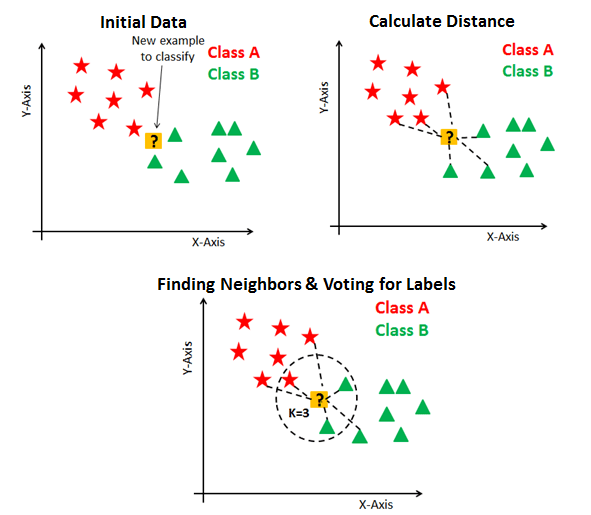


$$Eucledian \space distance(x_1, x_2) = \sqrt{\frac{1}{N}\sum_{i=1}^{n} (x_1^i - x_2^i)^2}$$

In [20]:
def euclidean_distance(v1, v2):
    distance = 0.0
    for i in range(len(v1)):
        distance += (v1[i] - v2[i]) ** 2
    return sqrt(distance)

In [21]:
def get_neighbors(train, test_row, num_neighbors):
    distance = []
    for train_id, train_row in enumerate(train):
        dist = euclidean_distance(test_row, train_row)
        distance.append((train_id, dist))

    distance.sort(key=lambda x: x[1])
    nearest_neighbors_ids = []
    for i in range(num_neighbors):
        nearest_neighbors_ids.append(distance[i][0])
        
    return nearest_neighbors_ids
    

In [22]:
def predict(X_train, X_test, y_train, num_neighbors):
    y_predict = []
    for x_test in X_test:
        nearest_neighbor_ids = get_neighbors(X_train, x_test, num_neighbors)
        y_preds = y_train[nearest_neighbor_ids]
        y_preds = y_preds.mean()
        y_predict.append(y_preds)
    
    return y_predict

In [23]:
y_predict = predict(X_train[:30], X_test[:5], y_train[:30], num_neighbors=5)
y_predict

[3.4, 4.0, 3.6, 4.0, 4.6]

In [24]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [25]:
y_pred

array([3.4, 4. , 3.4, 3.6, 4.6, 3. , 5.4, 5.2, 5. , 5.2, 4. , 5.8, 3.2,
       3. , 4.4, 4.2, 3.6, 2.8, 5.6, 6. , 2.4])

**MSE** (Mean Squared Error, среднеквадратичная ошибка):

$$MSE(y_{true}, y_{pred}) = \frac{1}{N}\sum_{i=1}^{n} (y^{true}_i - y^{pred}_i)^2$$

Чтобы значение метрики MSE имело масштаб значений целевой переменной, из него извлекают квадратный корень. RMSE (Root Mean Squared Error):

$$RMSE(y_{true}, y_{pred}) = \sqrt{\frac{1}{N}\sum_{i=1}^{n} (y^{true}_i - y^{pred}_i)^2}$$

MSE не ограничен сверху. Для ориентира часто берут наилучшее константное предсказание с точки зрения MSE — среднее арифметическое значений целевой переменной обучающей части данных. Далее можно посчитать метрику $R^2$:

$$R^2(y_{true}, y_{pred}) = 1 - \frac{\sum_{i=1}^{n} (y^{true}_i - y^{pred}_i)^2}{\sum_{i=1}^{n} (y^{true}_i - y^{true}_{mean})^2}$$

Верхняя граница $R^2$ — 1. Чем значение $R^2$, тем лучше обучилась модель.

Так как в MSE ошибка на каждом элементе возводится в квадрат, MSE сильно штрафует за большие ошибки на элементах. И если в наших тестовых данных присутствуют выбросы, то ошибки на этих выбросах будут вносить существенный вклад в MSE, и, чтобы уменьшить метрику, модель будет стараться уменьшать ошибки именно на этих на объектах-выбросах, а не на остальных элементах. Поэтому MSE может быть не лучшей метрикой для сравнения моделей на выборках с большим количеством выбросов. В таких случаях прибегают к метрике MAE (Mean Absolute Error):

$$MAE(y_{true}, y_{pred}) = \frac{1}{N}\sum_{i=1}^{n} |y^{true}_i - y^{pred}_i|$$

In [28]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

MSE_train = mean_squared_error(y_train, pred_train)
RMSE_train = sqrt(MSE_train)
R2_train = r2_score(y_train, pred_train)
MAE_train = mean_absolute_error(y_train, pred_train)

MSE_test = mean_squared_error(y_test, pred_test)
RMSE_test = sqrt(MSE_test)
R2_test = r2_score(y_test, pred_test)
MAE_test = mean_absolute_error(y_test, pred_test)

print(f'MSE train: {MSE_train:.2f}')
print(f'MSE test: {MSE_test:.2f}', end='\n\n')

print(f'RMSE train: {RMSE_train:.2f}')
print(f'RMSE test: {RMSE_test:.2f}', end='\n\n')

print(f'R2 train: {R2_train:.2f}')
print(f'R2 test: {R2_test:.2f}', end='\n\n')

print(f'MAE train: {MAE_train:.2f}')
print(f'MAE test: {MAE_test:.2f}')

MSE train: 2.24
MSE test: 3.83

RMSE train: 1.50
RMSE test: 1.96

R2 train: 0.34
R2 test: 0.15

MAE train: 1.24
MAE test: 1.66


In [33]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

MSE_train = mean_squared_error(y_train, pred_train)
RMSE_train = np.sqrt(MSE_train)
R2_train = r2_score(y_train, pred_train)
MAE_train = mean_absolute_error(y_train, pred_train)

MSE_test = mean_squared_error(y_test, pred_test)
RMSE_test = np.sqrt(MSE_test)
R2_test = r2_score(y_test, pred_test)
MAE_test = mean_absolute_error(y_test, pred_test)

print(f'MSE на обучении {MSE_train:.2f}')
print(f'MSE на тесте {MSE_test:.2f}', end='\n\n')

print(f'RMSE на обучении {RMSE_train:.2f}')
print(f'RMSE на тесте {RMSE_test:.2f}', end='\n\n')

print(f'R2 на обучении {R2_train:.2f}')
print(f'R2 на тесте {R2_test:.2f}', end='\n\n')

print(f'MAE на обучении {MAE_train:.2f}')
print(f'MAE на тесте {MAE_test:.2f}', end='\n\n')

MSE на обучении 0.00
MSE на тесте 3.00

RMSE на обучении 0.00
RMSE на тесте 1.73

R2 на обучении 1.00
R2 на тесте 0.34

MAE на обучении 0.00
MAE на тесте 1.29



In [37]:
scores = cross_validate(DecisionTreeRegressor(random_state=42), X, y, cv=5,
                        scoring={'r2': make_scorer(r2_score),
                        'mean_squared_error': make_scorer(mean_squared_error)},
                        return_train_score=True)

print('R2 train mean = ', scores['train_r2'].mean())
print('R2 test mean = ', scores['test_r2'].mean())

print('MSE train mean = ', scores['train_mean_squared_error'].mean())
print('MSE test mean = ', scores['test_mean_squared_error'].mean())

R2 train mean =  1.0
R2 test mean =  -0.5133546277634069
MSE train mean =  0.0
MSE test mean =  5.053333333333333


In [38]:
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [39]:
model = DecisionTreeRegressor(random_state=44)
model.fit(X_train, y_train)

print(f'MSE train = {mean_squared_error(y_train, model.predict(X_train))}')
print(f'MSE test = {mean_squared_error(y_test, model.predict(X_test))}')

MSE train = 0.0
MSE test = 3.1904761904761907


In [40]:
model = DecisionTreeRegressor(random_state=1,
                              max_depth=4,
                              min_samples_leaf=1,
                              max_leaf_nodes=None)

model.fit(X_train, y_train)

print(f'MSE train = {mean_squared_error(y_train, model.predict(X_train))}')
print(f'MSE test = {mean_squared_error(y_test, model.predict(X_test))}')

MSE train = 1.5961731678487
MSE test = 2.7513318664040463


In [55]:
model = DecisionTreeRegressor(random_state=1,
                              max_depth=4,
                              min_samples_leaf=1,
                              max_leaf_nodes=10)

model.fit(X_train, y_train)

print(f'MSE train = {mean_squared_error(y_train, model.predict(X_train))}')
print(f'MSE test = {mean_squared_error(y_test, model.predict(X_test))}')

MSE train = 1.6228398345153665
MSE test = 2.620961496033676


In [58]:
model = DecisionTreeRegressor()
param_grid = {
    'max_depth': [1, 2, 3, 4],
    'min_samples_leaf': [1,2, 3],
}

gridsearch = GridSearchCV(model, param_grid, refit=True, scoring=make_scorer(r2_score))
gridsearch.fit(X_train, y_train)

print(gridsearch.best_params_)

best_model = gridsearch.best_estimator_

print(f'MSE train = {mean_squared_error(y_train, best_model.predict(X_train))}')
print(f'MSE test = {mean_squared_error(y_test, best_model.predict(X_test))}')

{'max_depth': 1, 'min_samples_leaf': 1}
MSE train = 2.451926010678871
MSE test = 3.162459371435698


/home/matalhim/anaconda3/envs/ml/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


## Сохранение модели

In [ ]:
import pickle

filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))